#  Questions to answer

1. Describe the data, its structure, data types, formats etc
2. Divide the data into years, describe how evictions trends have changed in each year in
the data. What year had the largest number of evictions? Which one had the smallest
number of evictions? Discuss your findings and describe what were some of your
assumptions?
3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio
constant over time (calculate it separately for each year in the data)? Visualize the data
for each year and discuss the trends you found.
4. What are the full names of the top 5 eviction marshals (those who conducted the largest
number of evictions over time)?
5. How do 5 boroughs compare overtime in terms of the number of evictions in each?
Discuss the findings and compare them to each borough’s population counts.
6. Visualize the data as a choropleth map using NTA level, when the different shades
represent the number of evictions in a particular NTA. Discuss your findings.
7. Can you think of one additional socio-demographic attribute that may affect the number
of evictions in a particular neighborhood? Fetch data on that attribute and visualize it
side-by-side with evictions or in the same map. Discuss your assumptions and findings
as well as possible connections.

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
evic = pd.read_csv('Evictions.csv')

In [4]:
evic.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,Not an Ejectment,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,Not an Ejectment,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,Not an Ejectment,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing


# 1.Describe the data, its structure, data types, formats etc?

The data presents evictions in the New York City, it has evictions from all 5 boroughs from 2017 to 2021. The evictions have important attritbutes such as Eviction address/apartment number, Marshall first/last name, date executed, borough and NTA name. It has data types string and int. There are 66402 evictions and 20 attributes for each evictions some as mentioned before. 

Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

In [5]:
evic.shape


(66402, 20)

In [121]:
arrYears1=[]
arr2017=[]
for i in range(len(evic)):
    if(int(evic['Executed Date'][i][6:]) not in arrYears1):
        arrYears1.append(int(evic['Executed Date'][i][6:]))
arraYears1=arrYears1.sort()
print(arrYears1,'Before year edit')
arrYears1.pop()
arrYears1.pop()
print(arrYears1,'After year edit')
    
    

[2017, 2018, 2019, 2020, 2021, 2070] Before year edit
[2017, 2018, 2019, 2020] After year edit


In [122]:
arrYears=[]
for i in range(len(evic)):
    arrYears.append(evic['Executed Date'][i][6:])
evic['Years']=arrYears

In [123]:
evic.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTAName,Years
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,...,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River,2018
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,...,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York,2017
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,...,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South,2019
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,...,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing,2017


In [124]:
grouped=evic.groupby('Years')
grouped.count()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTAName
Years,,,,,,,,,,,,,,,,,,,,
2017,22530,22530,22530,19027,22530,22530,22530,22530,22530,22530,22530,22530,20385,20385,20385,20385,20385,20355,20355,20385
2018,21830,21830,21830,18107,21830,21830,21830,21830,21830,21830,21830,21830,19700,19700,19700,19700,19700,19662,19662,19700
2019,18647,18647,18647,15452,18647,18647,18647,18647,18647,18647,18647,18647,16924,16924,16924,16924,16924,16883,16883,16924
2020,3387,3387,3387,2829,3387,3387,3387,3387,3387,3387,3387,3387,3074,3074,3074,3074,3074,3066,3066,3074
2021,7,7,7,3,7,7,7,7,7,7,7,7,4,4,4,4,4,4,4,4
2070,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

Over the years there have been less evictions. They been steadly decreasing. The year with the largest evictions was 2017. The year with the smallest evictions considering the year 2021 is not over would be the year 2020. The reason for 2020 having little evictions was because of covid. They governor put a out a piece of legislation that did not permit landlords to kickout tenets during lockdown and extended it till after lockdown. A majority of the evictions from 2020 could have been from the start of the year.

In [10]:
arr17=[]
arr18=[]
arr19=[]
arr20=[]
arr21=[]
arr70=[]
for i in range(len(evic)):
    if(evic['Years'][i]=='2017'):
        arr17.append(list(dict(evic.iloc[i]).values()))
    elif(evic['Years'][i]=='2018'):
        arr18.append(list(dict(evic.iloc[i]).values()))
    elif(evic['Years'][i]=='2019'):
        arr19.append(list(dict(evic.iloc[i]).values()))
    elif(evic['Years'][i]=='2020'):
        arr20.append(list(dict(evic.iloc[i]).values()))
    elif(evic['Years'][i]=='2021'):
        arr21.append(list(dict(evic.iloc[i]).values()))
    else:
        arr70.append(list(dict(evic.iloc[i]).values()))


In [191]:
len(arr17)

22530

In [12]:
arr17=np.array(arr17)
arr18=np.array(arr18)
arr19=np.array(arr19)
arr20=np.array(arr20)
arr21=np.array(arr21)
arr70=np.array(arr70)

In [13]:
#arr

In [14]:
pd17=pd.DataFrame(arr17,columns=['Court Index Number','Docket Number','Eviction Address','Eviction Apartment Number','Executed Date',
                         'Marshal First Name','Marshal Last Name','Residential/Commercial','BOROUGH','Eviction Postcode',
                         'Ejectment','Eviction/Legal Possession','Latitude','Longitude','Community Board','Council District',
                         'Census Tract','BIN','BBL','NTA','Years'])

In [15]:
pd17

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,...,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3045167501.0,East New York,2017
1,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,...,Possession,40.755485,-73.83127900000001,7.0,20.0,849.0,4115061.0,4051010033.0,Flushing,2017
2,N250787/17,381407,209 EAST 118TH ST,3BC,07/17/2017,Richard,McCoy,Residential,MANHATTAN,10035,...,Possession,40.799065999999996,-73.938585,11.0,8.0,188.0,1054517.0,1017830005.0,East Harlem North,2017
3,52125,17982,1680 - BEDFORD AVENUE,16A,03/21/2017,Charles,Marchisotto,Residential,BROOKLYN,11225,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2017
4,R 50129/17,68884,1595 CASTLETON AVE. UNIT 2,nan,08/23/2017,Steven,Powell,Residential,STATEN ISLAND,10302,...,Possession,40.636083,-74.13643499999999,1.0,49.0,207.0,5025464.0,5010810002.0,Port Richmond,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22525,B806912/15,374824,595 TRINITY AVENUE,08B,12/13/2017,Richard,McCoy,Residential,BRONX,10455,...,Possession,40.81487,-73.90951700000001,1.0,17.0,73.0,2091317.0,2026230135.0,Melrose South-Mott Haven North,2017
22526,35821/17,67378,2119 TIEBOUT AVENUE,1,09/26/2017,Justin,Grossman,Residential,BRONX,10457,...,Possession,40.853325,-73.898588,5.0,15.0,379.0,2013360.0,2031440028.0,Mount Hope,2017
22527,52863/17,201815,162-10 SOUTH ROAD 1ST FLR EAST SIDE UNIT,nan,05/22/2017,Richard,Capuano,Commercial,QUEENS,11433,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2017
22528,58693/16,319816,725 SOUTHERN BLVD,6F,02/23/2017,John,Villanueva,Residential,BRONX,10455,...,Possession,40.814229,-73.898394,2.0,8.0,85.0,2005722.0,2027200030.0,Longwood,2017


In [16]:
pd18=pd.DataFrame(arr18,columns=['Court Index Number','Docket Number','Eviction Address','Eviction Apartment Number','Executed Date',
                         'Marshal First Name','Marshal Last Name','Residential/Commercial','BOROUGH','Eviction Postcode',
                         'Ejectment','Eviction/Legal Possession','Latitude','Longitude','Community Board','Council District',
                         'Census Tract','BIN','BBL','NTA','Years'])

In [17]:
pd18

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,...,Possession,40.832769,-73.86784200000001,9.0,18.0,76.0,2098742.0,2037850025.0,West Farms-Bronx River,2018
1,2455/18,169792,100 CO-OP CITY BLVD,9H,06/28/2018,Alfred,Locascio,Residential,BRONX,10475,...,Possession,40.871134999999995,-73.82511,10.0,12.0,46201.0,2096810.0,2051410120.0,Co-op City,2018
2,26710/18,170022,2 FORDHAM HILL OVAL,11A,08/10/2018,Alfred,Locascio,Residential,BRONX,10468,...,Possession,40.864394,-73.908097,7.0,14.0,261.0,2092432.0,2032260053.0,Kingsbridge Heights,2018
3,063003/17,78623,2537 DECATUR AVENUE,23,02/01/2018,Henry,Daley,Residential,BRONX,10458,...,Possession,40.862072,-73.89157900000001,7.0,15.0,39901.0,2016326.0,2032750057.0,Bedford Park-Fordham North,2018
4,36997/17,472925,2701 WEBB AVE,UNIT 5K,02/08/2018,Danny,Weinheim,Residential,BRONX,10468,...,Possession,40.869275,-73.902179,8.0,14.0,26701.0,2015288.0,2032480136.0,Van Cortlandt Village,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21825,B55749/17,101907,2320 BRONX PARK EAST,1G,05/14/2018,Darlene,Barone,Residential,BRONX,10467,...,Possession,40.860036,-73.870734,11.0,15.0,33201.0,2049747.0,2043400025.0,Bronxdale,2018
21826,95461/17,204267,696 NOSTRAND AVE UNIT STORE,nan,01/31/2018,Richard,Capuano,Commercial,BROOKLYN,11216,...,Possession,40.674759,-73.950052,8.0,36.0,31701.0,3030970.0,3012260041.0,Crown Heights North,2018
21827,73941/17,168223,224 HIGHLAND BLVD,405,02/02/2018,Alfred,Locascio,Residential,BROOKLYN,11207,...,Possession,40.682153,-73.893072,5.0,37.0,114202.0,3086213.0,3038860010.0,Cypress Hills-City Line,2018
21828,52349/18,81108,321 EAST 22ND STREET,4N,04/05/2018,Henry,Daley,Residential,MANHATTAN,10012,...,Possession,40.736934000000005,-73.980684,6.0,2.0,64.0,1020570.0,1009280009.0,Gramercy,2018


In [18]:
pd19=pd.DataFrame(arr19,columns=['Court Index Number','Docket Number','Eviction Address','Eviction Apartment Number','Executed Date',
                         'Marshal First Name','Marshal Last Name','Residential/Commercial','BOROUGH','Eviction Postcode',
                         'Ejectment','Eviction/Legal Possession','Latitude','Longitude','Community Board','Council District',
                         'Census Tract','BIN','BBL','NTA','Years'])

In [19]:
pd19

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2019
1,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,...,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1019290029.0,Central Harlem South,2019
2,61034/18,91389,1240 WASHINGTON AVE,2L,02/05/2019,Henry,Daley,Residential,BRONX,10456,...,Possession,40.831759000000005,-73.906621,3.0,16.0,145.0,2113605.0,2023730006.0,Claremont-Bathgate,2019
3,62423/18,12338,671 WEST 193 ST,3B,03/19/2019,George,"Essock, Jr.",Residential,MANHATTAN,10040,...,Possession,40.858045000000004,-73.931076,12.0,10.0,283.0,1079927.0,1021700560.0,Washington Heights North,2019
4,5141/19,490173,1704 VAN BUREN STREE T,4C,08/21/2019,Danny,Weinheim,Residential,BRONX,10460,...,Possession,40.841421000000004,-73.87034,11.0,15.0,240.0,2042599.0,2040190035.0,Van Nest-Morris Park-Westchester Square,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18642,19063/17,347297,75 LASALLE STREET,18E,02/28/2019,Thomas,Bia,Residential,MANHATTAN,10027,...,Eviction,40.813235,-73.958325,9.0,7.0,211.0,1084119.0,1019800001.0,Morningside Heights,2019
18643,K56139/19,99112,188 MARCUS GARVEY BO ULEVARD,404,10/28/2019,Ileana,Rivera,Residential,BROOKLYN,11221,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2019
18644,B46885/18,113169,300 RESERVOIR PLACE,1G,04/03/2019,Darlene,Barone,Residential,BRONX,10467,...,Possession,40.878997,-73.874595,7.0,11.0,423.0,2018205.0,2033430155.0,Norwood,2019
18645,67709/18A,90927,18502 NASHVILLE BOUL EVARD,-,02/15/2019,Justin,Grossman,Residential,QUEENS,11413,...,Possession,40.681095,-73.75853000000001,12.0,27.0,352.0,4273912.0,4127120020.0,St. Albans,2019


In [20]:
pd20=pd.DataFrame(arr20,columns=['Court Index Number','Docket Number','Eviction Address','Eviction Apartment Number','Executed Date',
                         'Marshal First Name','Marshal Last Name','Residential/Commercial','BOROUGH','Eviction Postcode',
                         'Ejectment','Eviction/Legal Possession','Latitude','Longitude','Community Board','Council District',
                         'Census Tract','BIN','BBL','NTA','Years'])

In [21]:
pd20

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,42613/19,101644,1424 WALTON AVENUE,2G,03/10/2020,Justin,Grossman,Residential,BRONX,10452,...,Possession,40.840090000000004,-73.91555100000001,4.0,14.0,223.0,2008102.0,2028430079.0,West Concourse,2020
1,45735/18,357102,1679 SOUTHERN BOULEVARD,3C,02/13/2020,Thomas,Bia,Residential,BRONX,10460,...,Possession,40.836038,-73.888568,3.0,17.0,155.0,2010525.0,2029780198.0,Crotona Park East,2020
2,12675/18,354003,75 LASALLE STREET,7D,02/10/2020,Thomas,Bia,Residential,MANHATTAN,10027,...,Eviction,40.813235,-73.958325,9.0,7.0,211.0,1084119.0,1019800001.0,Morningside Heights,2020
3,52579/19,78352,31 SUSAN COURT ENTIRE HOUSE,nan,01/02/2020,Kenneth,Giachetta,Residential,STATEN ISLAND,10304,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2020
4,56541/19B,96675,1035 PRESIDENT ST,UNIT 3,02/07/2020,Justin,Grossman,Residential,BROOKLYN,11225,...,Possession,40.668588,-73.95701,9.0,35.0,325.0,3033141.0,3012730060.0,Crown Heights South,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,63614/19B,97819,202A SARATOGA AVENUE,3,01/08/2020,Justin,Grossman,Residential,BROOKLYN,11233,...,Possession,40.679271,-73.916475,3.0,41.0,379.0,3041602.0,3015310037.0,Stuyvesant Heights,2020
3383,72569/19,495975,600 W 189TH ST AKA 1 571-1581 ST. NICHOL*,4C,02/10/2020,Danny,Weinheim,Residential,MANHATTAN,10040,...,Possession,40.854381,-73.930274,12.0,10.0,279.0,1064011.0,1021680046.0,Washington Heights North,2020
3384,B41837/19,100785,1748 CROSS BX EXPY,GROUND FLOOR-LEFT AP,02/18/2020,Ileana,Rivera,Residential,BRONX,10472,...,Possession,40.835453,-73.869553,9.0,18.0,76.0,2028146.0,2038960012.0,West Farms-Bronx River,2020
3385,67178/19,26901,57-59 GRANGER STREET,nan,03/09/2020,Edward,Guida,Residential,QUEENS,11368,...,Possession,40.738918,-73.85630400000001,4.0,21.0,43702.0,4467720.0,4019510001.0,Corona,2020


In [22]:
pd21=pd.DataFrame(arr21,columns=['Court Index Number','Docket Number','Eviction Address','Eviction Apartment Number','Executed Date',
                         'Marshal First Name','Marshal Last Name','Residential/Commercial','BOROUGH','Eviction Postcode',
                         'Ejectment','Eviction/Legal Possession','Latitude','Longitude','Community Board','Council District',
                         'Census Tract','BIN','BBL','NTA','Years'])

In [23]:
pd21

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,80034/19,63586,2118 AVENUE U,STORE,01/04/2021,Howard,Schain,Commercial,BROOKLYN,11229,...,Possession,40.599515999999994,-73.950115,15.0,48.0,578.0,3199836.0,3073540008.0,Madison,2021
1,901310/19,358618,117 ROCKWOOD STREET,FIRST,01/11/2021,Thomas,Bia,Commercial,BRONX,10452,...,Possession,40.841944,-73.91326,4.0,14.0,209.0,2008013.0,2028360030.0,West Concourse,2021
2,79035/19,106064,2253 STRAUSS STRE ET A/K/A 47 NEWPORT STREET,STOREFRONT,02/09/2021,Justin,Grossman,Commercial,BROOKLYN,11212,...,Possession,40.658878,-73.913787,16.0,42.0,896.0,3082249.0,3035970006.0,Brownsville,2021
3,55269/20,13639,66-31 OTTO ROAD,nan,01/12/2021,Robert,Renzulli,Commercial,QUEENS,11385,...,Possession,40.705458,-73.88929399999999,5.0,30.0,61301.0,4089237.0,4036670579.0,Ridgewood,2021
4,65405/19,12421,442A EAST 14TH STREET - THE STREET LEVEL STORE...,nan,02/04/2021,Robert,Renzulli,Commercial,MANHATTAN,10009,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2021
5,71338/19,103189,14 DURYEA PLACE THE RETAIL COMMERCIAL RESTAURA...,nan,01/04/2021,Henry,Daley,Commercial,BROOKLYN,11226,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2021
6,63780/19,208836,118-05 LIBERTY AVENUE FIRST FLOOR STORE BASEME...,nan,03/02/2021,Richard,Capuano,Commercial,QUEENS,11419,...,Possession,nan,nan,nan,nan,nan,nan,nan,nan,2021


In [24]:
pd70=pd.DataFrame(arr70,columns=['Court Index Number','Docket Number','Eviction Address','Eviction Apartment Number','Executed Date',
                         'Marshal First Name','Marshal Last Name','Residential/Commercial','BOROUGH','Eviction Postcode',
                         'Ejectment','Eviction/Legal Possession','Latitude','Longitude','Community Board','Council District',
                         'Census Tract','BIN','BBL','NTA','Years'])

In [25]:
pd70

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,28748/16,317112,2714 BAINBRIDGE AVENUE,4A,03/29/2070,John,Villanueva,Residential,BRONX,10458,...,Possession,40.865990999999994,-73.890958,7.0,15.0,40502.0,2016625.0,2032870050.0,Bedford Park-Fordham North,2070


# What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.

The ratio of commercial to residential evictions in the entire data is 0.09197651663405088. As the years have gone by the ratio of commercial to residential evictions has risen from 0.082653->0.092155->0.098498->0.115980 from 2017 to 2020.

In [26]:
res=0
com=0
for i in range(len(evic)):
    if(evic['Residential/Commercial'][i]=='Residential'):
        res+=1
    elif(evic['Residential/Commercial'][i]=='Commercial'):
        com+=1
(res,com)

(60809, 5593)

In [27]:
com/res

0.09197651663405088

In [28]:
#Was this ratio constant over time (calculate it separately for each year in the data)?
res17=0
com17=0
for i in range(len(pd17)):
    if(pd17['Residential/Commercial'][i]=='Residential'):
        res17+=1
    elif(pd17['Residential/Commercial'][i]=='Commercial'):
        com17+=1

In [29]:
ratio17=com17/res17

In [195]:
print(com17)

1720


In [196]:
print(res17)

20810


In [30]:
res18=0
com18=0
for i in range(len(pd18)):
    if(pd18['Residential/Commercial'][i]=='Residential'):
        res18+=1
    elif(pd18['Residential/Commercial'][i]=='Commercial'):
        com18+=1

In [31]:
ratio18=com18/res18

In [197]:
print(com18)

1842


In [198]:
print(res18)

19988


In [32]:
res19=0
com19=0
for i in range(len(pd19)):
    if(pd19['Residential/Commercial'][i]=='Residential'):
        res19+=1
    elif(pd19['Residential/Commercial'][i]=='Commercial'):
        com19+=1

In [33]:
ratio19=com19/res19

In [34]:
res20=0
com20=0
for i in range(len(pd20)):
    if(pd20['Residential/Commercial'][i]=='Residential'):
        res20+=1
    elif(pd20['Residential/Commercial'][i]=='Commercial'):
        com20+=1

In [35]:
ratio20=com20/res20

In [36]:
res21=0
com21=0
for i in range(len(pd21)):
    if(pd21['Residential/Commercial'][i]=='Residential'):
        res21+=1
    elif(pd21['Residential/Commercial'][i]=='Commercial'):
        com21+=1

In [37]:
#com21/0
ratio21=0

In [38]:
res70=0
com70=0
for i in range(len(pd70)):
    if(pd70['Residential/Commercial'][i]=='Residential'):
        res70+=1
    elif(pd70['Residential/Commercial'][i]=='Commercial'):
        com70+=1

In [39]:
ratio70=com70/res70

In [125]:
arrYears1=np.array(arrYears1)
ye=pd.DataFrame(arrYears1,columns=['Years'])

In [126]:
print(ye)

   Years
0   2017
1   2018
2   2019
3   2020


In [127]:
yAxis=np.array([ratio17,ratio18,ratio19,ratio20])
yAxDF=pd.DataFrame(yAxis,columns=['Ratios'])

In [128]:
yAxDF

,Ratios
0,0.082653
1,0.092155
2,0.098498
3,0.115980


([<matplotlib.axis.XTick at 0x7fddfaa21580>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

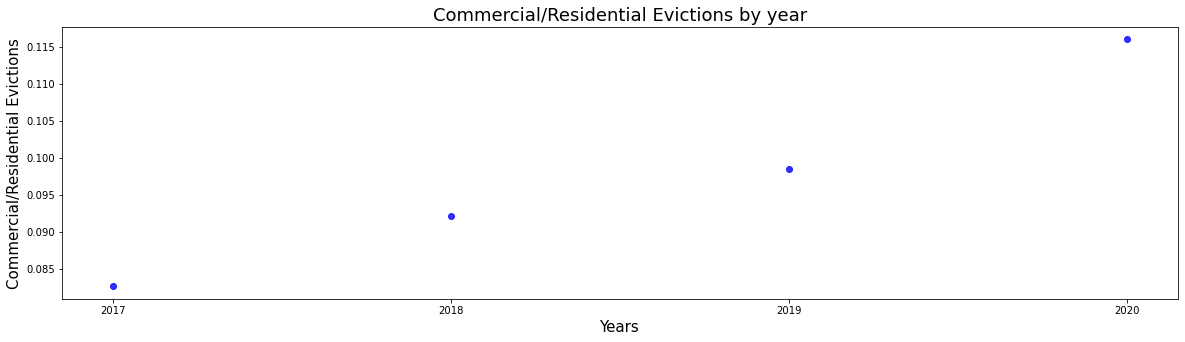

In [194]:
plt.figure(figsize=(20,5))
plt.plot(ye, yAxDF, 'ro', c='b',alpha=0.8)
plt.title('Commercial/Residential Evictions by year',fontsize=18)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Commercial/Residential Evictions',fontsize=15)
plt.xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))

# How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.

In [101]:
#population 
borough17=pd17.groupby(['BOROUGH']).count()

In [102]:
borough17

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
BOROUGH,,,,,,,,,,,,,,,,,,,,
BRONX,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662,7662
BROOKLYN,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357,6357
MANHATTAN,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452,3452
QUEENS,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325,4325
STATEN ISLAND,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734,734


In [103]:
borough18=pd18.groupby(['BOROUGH']).count()

In [104]:
borough18

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
BOROUGH,,,,,,,,,,,,,,,,,,,,
BRONX,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140,7140
BROOKLYN,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157
MANHATTAN,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390
QUEENS,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452
STATEN ISLAND,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691


In [105]:
borough19=pd19.groupby(['BOROUGH']).count()

In [106]:
borough19

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
BOROUGH,,,,,,,,,,,,,,,,,,,,
BRONX,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188,6188
BROOKLYN,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312,5312
MANHATTAN,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806,2806
QUEENS,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705
STATEN ISLAND,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636


In [107]:
borough20=pd20.groupby(['BOROUGH']).count()

In [108]:
borough20

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
BOROUGH,,,,,,,,,,,,,,,,,,,,
BRONX,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061
BROOKLYN,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
MANHATTAN,518,518,518,518,518,518,518,518,518,518,518,518,518,518,518,518,518,518,518,518
QUEENS,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693,693
STATEN ISLAND,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112


In [109]:
borough21=pd21.groupby(['BOROUGH']).count()

In [110]:
borough21

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
BOROUGH,,,,,,,,,,,,,,,,,,,,
BRONX,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BROOKLYN,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
MANHATTAN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
QUEENS,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [219]:
#[2017,2018,2019,2020]
bronx=[7662,7140,6188,1061] #1
bk=[6357,6157,5312,1003] #3
man=[3452,3390,2806,518] #1
queens=[4325,4452,3705,693]#2
SI=[734,691,636,112] #0

In [185]:
bronxP=[1440620,1432090,1418210,1404330] #1390450
bkP=[2635000,2601000,2590000,2600000] #2589970
manP=[1654000,1632000,1632000,1586381] #1631990
queensP=[2295810,2274600,2253860,2233110] #2212360
SIP=[475948,474101,474893,475000] #474893
bxP=np.array(bronxP)
bkP=np.array(bkP)
manP=np.array(manP)
qP=np.array(queensP)
SIP=np.array(SIP)

# How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts. 

For each of the 5 boroughs there has been a drop in eviction number starting from the year 2017 to 2020. People may be acting more resposible. As mentioned before the number of evictions dropped significantly for all boroughs for the 2020 year because of covid. the governor made some legislation where landlords could not evict the tenets at the start of pandemic and has extended it into the 2021 year. There has also been an overall drop in the population for each of the 5 boroughs. SEE GRAPHS BELOW. 

"\nplt.title('Bronx Evictions by year',fontsize=18)\nplt.xlabel('Years',fontsize=15)\nplt.ylabel('Evictions',fontsize=15)\nplt.xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))\nplt.plot(ye, bxYDF, 'ro', c='b',alpha=0.8)\n\n"

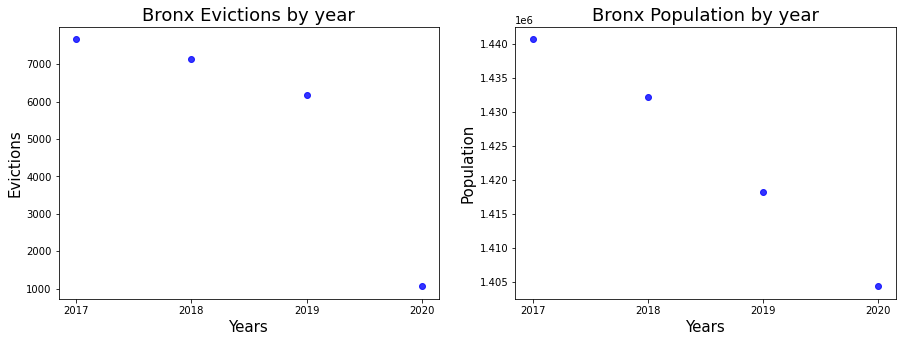

In [186]:
bxY=np.array(bronx)
#bxYDF=pd.DataFrame(bxY,columns=['Evictions by year'])
#plt.subplot(1, 2, 1)

fig1=plt.figure(figsize=(15,5))
ax = fig1.add_subplot(121)
# Adds subplot on position 2
ax2 = fig1.add_subplot(122)

ax.plot(ye, bxY, 'ro', c='b',alpha=0.8)
ax2.plot(ye, bxP, 'ro', c='b',alpha=0.8)
ax.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
ax2.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
ax.set_title('Bronx Evictions by year',fontsize=18)
ax2.set_title('Bronx Population by year',fontsize=18)
ax.set_xlabel('Years',fontsize=15)
ax.set_ylabel('Evictions',fontsize=15)
ax2.set_xlabel('Years',fontsize=15)
ax2.set_ylabel('Population',fontsize=15)
'''
plt.title('Bronx Evictions by year',fontsize=18)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Evictions',fontsize=15)
plt.xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
plt.plot(ye, bxYDF, 'ro', c='b',alpha=0.8)

'''


Text(0, 0.5, 'Population')

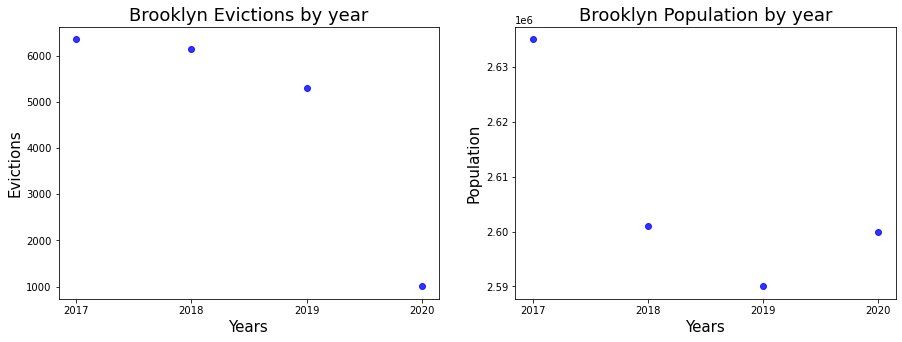

In [187]:
bkY=np.array(bk)
fig1=plt.figure(figsize=(15,5))
bkax = fig1.add_subplot(121)
# Adds subplot on position 2
bkax2 = fig1.add_subplot(122)

bkax.plot(ye, bkY, 'ro', c='b',alpha=0.8)
bkax2.plot(ye, bkP, 'ro', c='b',alpha=0.8)
bkax.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
bkax2.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
bkax.set_title('Brooklyn Evictions by year',fontsize=18)
bkax2.set_title('Brooklyn Population by year',fontsize=18)
bkax.set_xlabel('Years',fontsize=15)
bkax.set_ylabel('Evictions',fontsize=15)
bkax2.set_xlabel('Years',fontsize=15)
bkax2.set_ylabel('Population',fontsize=15)

Text(0, 0.5, 'Population')

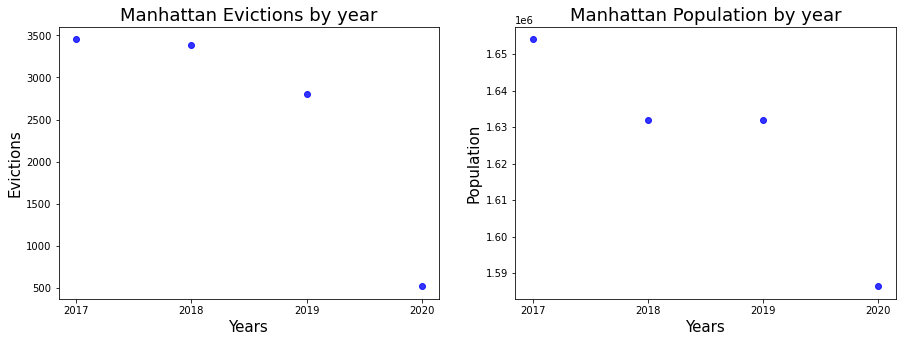

In [188]:
manY=np.array(man)
fig1=plt.figure(figsize=(15,5))
mnax = fig1.add_subplot(121)
# Adds subplot on position 2
mnax2 = fig1.add_subplot(122)

mnax.plot(ye, manY, 'ro', c='b',alpha=0.8)
mnax2.plot(ye, manP, 'ro', c='b',alpha=0.8)
mnax.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
mnax2.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
mnax.set_title('Manhattan Evictions by year',fontsize=18)
mnax2.set_title('Manhattan Population by year',fontsize=18)
mnax.set_xlabel('Years',fontsize=15)
mnax.set_ylabel('Evictions',fontsize=15)
mnax2.set_xlabel('Years',fontsize=15)
mnax2.set_ylabel('Population',fontsize=15)

Text(0, 0.5, 'Population')

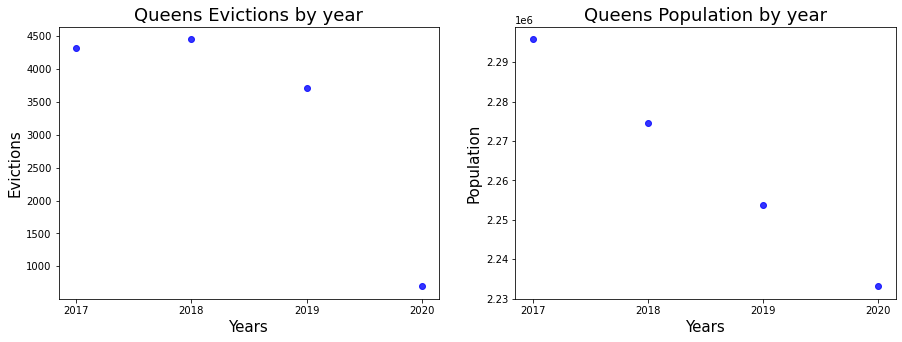

In [189]:
queensY=np.array(queens)
fig1=plt.figure(figsize=(15,5))
qax = fig1.add_subplot(121)
# Adds subplot on position 2
qax2 = fig1.add_subplot(122)

qax.plot(ye, queensY, 'ro', c='b',alpha=0.8)
qax2.plot(ye, qP, 'ro', c='b',alpha=0.8)
qax.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
qax2.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
qax.set_title('Queens Evictions by year',fontsize=18)
qax2.set_title('Queens Population by year',fontsize=18)
qax.set_xlabel('Years',fontsize=15)
qax.set_ylabel('Evictions',fontsize=15)
qax2.set_xlabel('Years',fontsize=15)
qax2.set_ylabel('Population',fontsize=15)

Text(0, 0.5, 'Population')

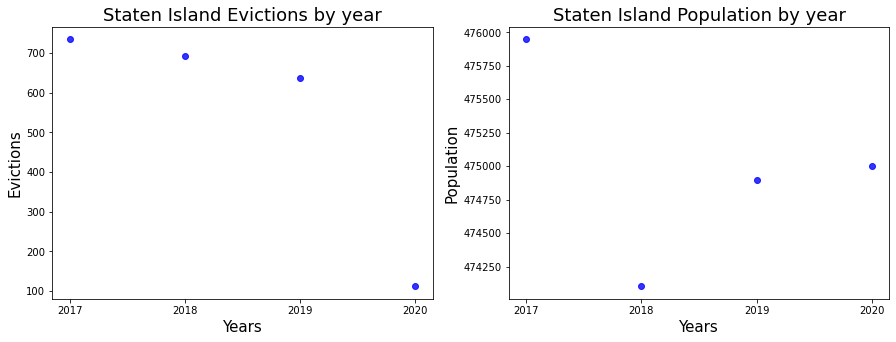

In [190]:
SIY=np.array(SI)
fig1=plt.figure(figsize=(15,5))
Sax = fig1.add_subplot(121)
# Adds subplot on position 2
Sax2 = fig1.add_subplot(122)

Sax.plot(ye, SIY, 'ro', c='b',alpha=0.8)
Sax2.plot(ye, SIP, 'ro', c='b',alpha=0.8)
Sax.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
Sax2.set_xticks(np.arange(min(arrYears1), max(arrYears1)+1, 1.0))
Sax.set_title('Staten Island Evictions by year',fontsize=18)
Sax2.set_title('Staten Island Population by year',fontsize=18)
Sax.set_xlabel('Years',fontsize=15)
Sax.set_ylabel('Evictions',fontsize=15)
Sax2.set_xlabel('Years',fontsize=15)
Sax2.set_ylabel('Population',fontsize=15)

In [159]:
#[2017,2018,2019,2020] #2021
'''
bronxP=[1440620,1432090,1418210,1404330] #1390450
bkP=[2635000,2601000,2590000,2648403] #2589970
manP=[1654000,1632000,1632000,1586381] #1631990
queensP=[2295810,2274600,2253860,2233110] #2212360
SIP=[475948,474101,474893,475000] #474893
bxP=np.array(bronxP)
bkP=np.array(bkP)
manP=np.array(manP)
qP=np.array(queensP)
SIP=np.array(SIP)

'''


# What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?


1)Justin Grossman 2)Henry Daley	3)Ileana Rivera	4)Thomas Bia 5)Edward Guida	

In [45]:
evic.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,...,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River,2018
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,...,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York,2017
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,...,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South,2019
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,...,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing,2017


In [46]:
groupby_Name=evic.groupby(['Marshal First Name','Marshal Last Name']).count()

In [47]:
groupby_Name

,,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
Marshal First Name,Marshal Last Name,,,,,,,,,,,,,,,,,,,
Alfred,Locascio,1425,1425,1425,1320,1425,1425,1425,1425,1425,1425,1321,1321,1321,1321,1321,1320,1320,1321,1425
Bernard,Blake,446,446,446,81,446,446,446,446,446,446,428,428,428,428,428,427,427,428,446
Bruce,Kemp,366,366,366,290,366,366,366,366,366,366,301,301,301,301,301,301,301,301,366
Charles,Marchisotto,394,394,394,386,394,394,394,394,394,394,47,47,47,47,47,47,47,47,394
Danny,Weinheim,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5101,5101,5101,5101,5101,5099,5099,5101,5350
Darlene,Barone,3730,3730,3730,3584,3730,3730,3730,3730,3730,3730,3656,3656,3656,3656,3656,3650,3650,3656,3730
Edward,Guida,5422,5422,5422,2459,5422,5422,5422,5422,5422,5422,5328,5328,5328,5328,5328,5315,5315,5328,5422
Frank,Siracusa,551,551,551,278,551,551,551,551,551,551,332,332,332,332,332,332,332,332,551
Gary,Rose,1557,1557,1557,1188,1557,1557,1557,1557,1557,1557,1348,1348,1348,1348,1348,1344,1344,1348,1557


In [48]:
groupby_Name.sort_values(['Court Index Number'],ascending=False)

,,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
Marshal First Name,Marshal Last Name,,,,,,,,,,,,,,,,,,,
Justin,Grossman,9173,9173,9173,9172,9173,9173,9173,9173,9173,9173,8807,8807,8807,8807,8807,8787,8787,8807,9173
Henry,Daley,6487,6487,6487,5686,6487,6487,6487,6487,6487,6487,5796,5796,5796,5796,5796,5779,5779,5796,6487
Ileana,Rivera,5842,5842,5842,4913,5842,5842,5842,5842,5842,5842,5630,5630,5630,5630,5630,5619,5619,5630,5842
Thomas,Bia,5560,5560,5560,5456,5560,5560,5560,5560,5560,5560,5512,5512,5512,5512,5512,5502,5502,5512,5560
Edward,Guida,5422,5422,5422,2459,5422,5422,5422,5422,5422,5422,5328,5328,5328,5328,5328,5315,5315,5328,5422
Danny,Weinheim,5350,5350,5350,5350,5350,5350,5350,5350,5350,5350,5101,5101,5101,5101,5101,5099,5099,5101,5350
Richard,McCoy,4023,4023,4023,4021,4023,4023,4023,4023,4023,4023,3838,3838,3838,3838,3838,3836,3836,3838,4023
Darlene,Barone,3730,3730,3730,3584,3730,3730,3730,3730,3730,3730,3656,3656,3656,3656,3656,3650,3650,3656,3730
George,"Essock, Jr.",2661,2661,2661,1922,2661,2661,2661,2661,2661,2661,2178,2178,2178,2178,2178,2173,2173,2178,2661


In [49]:
count=0
for i in range(len(evic)):
    if(evic['Marshal First Name'][i]=='Justin' and evic['Marshal Last Name'][i]=='Grossman'):
        count+=1

    
    

In [50]:
count

9173

# Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.

In [56]:
evic.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Years
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,...,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River,2018
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,...,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York,2017
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,...,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South,2019
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,...,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing,2017


In [57]:
groupby_NTA=evic.groupby('NTA').count()

In [58]:
groupby_NTA

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Years
NTA,,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,143,143,143,125,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
Annadale-Huguenot-Prince's Bay-Eltingville,17,17,17,8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Arden Heights,25,25,25,11,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Astoria,313,313,313,244,313,313,313,313,313,313,313,313,313,313,313,313,313,311,311,313
Auburndale,30,30,30,15,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodside,151,151,151,103,151,151,151,151,151,151,151,151,151,151,151,151,151,150,150,151
Yorkville,232,232,232,221,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
park-cemetery-etc-Bronx,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [59]:
sort_groupby_NTA=groupby_NTA.sort_values(['Court Index Number'],ascending=False)

In [60]:
sort_groupby_NTA

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Years
NTA,,,,,,,,,,,,,,,,,,,,
East New York,1363,1363,1363,1140,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1362,1362,1363
Crown Heights North,1303,1303,1303,1201,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
East Concourse-Concourse Village,1227,1227,1227,1209,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
Central Harlem North-Polo Grounds,1195,1195,1195,1170,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1194,1194,1195
Williamsbridge-Olinville,1186,1186,1186,1095,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1185,1185,1186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arden Heights,25,25,25,11,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Rossville-Woodrow,18,18,18,6,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Annadale-Huguenot-Prince's Bay-Eltingville,17,17,17,8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [85]:
#NTA file was used was from https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-nynta.page
nyc = gpd.read_file('nynta_21a')
nyc.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16..."


In [86]:
nyc.shape

(195, 8)

In [87]:
evic=evic.rename(columns={'NTA': 'NTAName'})

In [88]:
evic

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTAName,Years
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,...,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,...,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River,2018
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,...,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York,2017
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,...,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South,2019
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,...,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66397,52349/18,81108,321 EAST 22ND STREET,4N,04/05/2018,Henry,Daley,Residential,MANHATTAN,10012,...,Possession,40.736934,-73.980684,6.0,2.0,64.0,1020570.0,1.009280e+09,Gramercy,2018
66398,5103/17,333036,3301 HUNTER AVENUE,"2,2ND FL",03/09/2018,Thomas,Bia,Residential,BRONX,10475,...,Possession,40.879267,-73.833475,12.0,12.0,46202.0,2113687.0,2.052320e+09,Co-op City,2018
66399,58693/16,319816,725 SOUTHERN BLVD,6F,02/23/2017,John,Villanueva,Residential,BRONX,10455,...,Possession,40.814229,-73.898394,2.0,8.0,85.0,2005722.0,2.027200e+09,Longwood,2017
66400,95209/16,59806,46 FOUNTAIN AVENUE,BASEMENT,05/12/2017,Justin,Grossman,Residential,BROOKLYN,11208,...,Possession,40.679119,-73.876323,5.0,37.0,1192.0,3093176.0,3.041540e+09,East New York,2017


In [89]:
groupby_NTA=evic.groupby('NTAName').count()

In [90]:
groupby_NTA

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Years
NTAName,,,,,,,,,,,,,,,,,,,,
Allerton-Pelham Gardens,143,143,143,125,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143,143
Annadale-Huguenot-Prince's Bay-Eltingville,17,17,17,8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Arden Heights,25,25,25,11,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Astoria,313,313,313,244,313,313,313,313,313,313,313,313,313,313,313,313,313,311,311,313
Auburndale,30,30,30,15,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodside,151,151,151,103,151,151,151,151,151,151,151,151,151,151,151,151,151,150,150,151
Yorkville,232,232,232,221,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
park-cemetery-etc-Bronx,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


In [91]:
sort_groupby_NTA=groupby_NTA.sort_values(['Court Index Number'],ascending=False)

In [92]:
sort_groupby_NTA

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Years
NTAName,,,,,,,,,,,,,,,,,,,,
East New York,1363,1363,1363,1140,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1363,1362,1362,1363
Crown Heights North,1303,1303,1303,1201,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
East Concourse-Concourse Village,1227,1227,1227,1209,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
Central Harlem North-Polo Grounds,1195,1195,1195,1170,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1194,1194,1195
Williamsbridge-Olinville,1186,1186,1186,1095,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1185,1185,1186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arden Heights,25,25,25,11,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Rossville-Woodrow,18,18,18,6,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Annadale-Huguenot-Prince's Bay-Eltingville,17,17,17,8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [93]:
nyc = nyc.merge(sort_groupby_NTA, on='NTAName')

In [94]:
nyc

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,Court Index Number,Docket Number,...,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Years
0,3,Brooklyn,047,BK88,Borough Park,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16...",181,181,...,181,181,181,181,181,181,181,181,181,181
1,4,Queens,081,QN51,Murray Hill,33266.904872,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ...",177,177,...,177,177,177,177,177,177,177,177,177,177
2,4,Queens,081,QN27,East Elmhurst,19816.712132,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ...",96,96,...,96,96,96,96,96,96,96,96,96,96
3,4,Queens,081,QN07,Hollis,20976.335781,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ...",218,218,...,218,218,218,218,218,218,218,217,217,218
4,3,Brooklyn,047,BK25,Homecrest,27514.022918,2.999197e+07,"POLYGON ((995746.857 161665.390, 995833.832 16...",162,162,...,162,162,162,162,162,162,162,162,162,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,3,Brooklyn,047,BK93,Starrett City,17414.782263,1.159895e+07,"MULTIPOLYGON (((1015251.087 174914.561, 101524...",165,165,...,165,165,165,165,165,165,165,165,165,165
187,3,Brooklyn,047,BK73,North Side-South Side,28149.966570,2.887016e+07,"POLYGON ((995851.916 203199.332, 995969.192 20...",200,200,...,200,200,200,200,200,200,200,199,199,200
188,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ...",132,132,...,132,132,132,132,132,132,132,132,132,132
189,1,Manhattan,061,MN21,Gramercy,12096.891069,7.526916e+06,"POLYGON ((990196.892 207745.371, 990187.613 20...",68,68,...,68,68,68,68,68,68,68,68,68,68


In [ ]:
'''
nyc.plot(column='Court Index Number',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('NTA by eviction', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()
'''


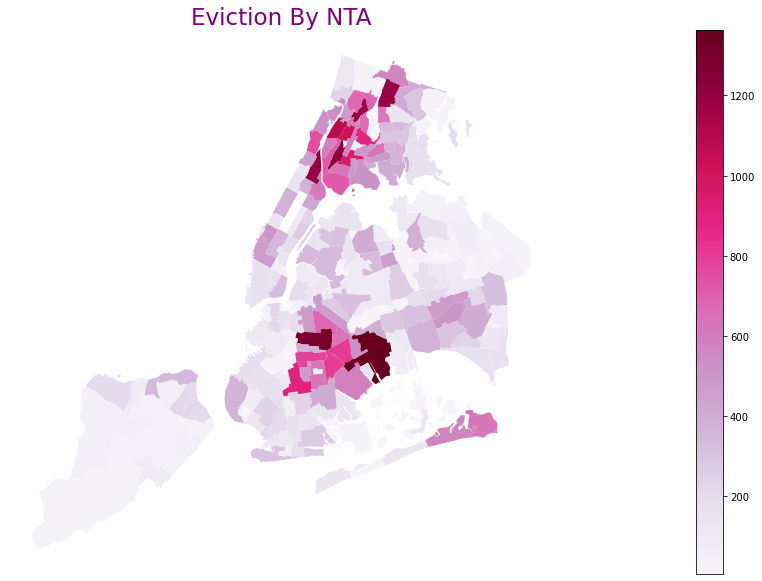

In [100]:
nyc.plot(column='Court Index Number',legend=True,figsize=(50, 10),cmap='PuRd')
plt.axis('off')
plt.title('Eviction By NTA', fontsize=23, color ='purple')
plt.show()

There appears to be alot of evictions in the bronx and in brooklyn. Places such as East New York, Crown heights,central harlem.

# Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections.

Education is a big factor that can affect the number of evictions, whether an education can lead you to getting a good job which can lead to making more money and as a result can prevent you form getting evicted. Or whether that being more knowledgable and preventing eviction by handling yourself a certain way. it seems as if there is a connection between being evicted and the level of education you recieve. Perhaps those communities where a lot of evictions occur tend to have lower education levels. It appears by looking at both graphs that there is connection between getting your bachelors degree and getting evicted. People who tend to not get their bachelors degree happen to get evicted more.

In [204]:
nyc_cm = gpd.read_file('NYC_Community_Districts')
nyc_cm.head()

,OBJECTID,BoroCD,Shape__Are,Shape__Len,geometry
0,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,102,3.768921e+07,34130.296607,"POLYGON ((-73.99684 40.73737, -73.99362 40.736..."
2,3,103,4.687929e+07,30468.288591,"POLYGON ((-73.97178 40.72583, -73.97179 40.725..."
3,4,104,4.931171e+07,67623.648603,"POLYGON ((-73.99394 40.77319, -73.99370 40.773..."
4,5,105,4.379033e+07,35288.188510,"POLYGON ((-73.97302 40.76429, -73.97141 40.763..."


In [208]:
ed=pd.read_csv('Education.csv')

In [209]:
ed

,Location,Education Level,TimeFrame,DataFormat,Data,BoroCD
0,Battery Park/Tribeca,Bachelor's Degree or Higher,2019,Number,41272.84263,101
1,Greenwich Village,Bachelor's Degree or Higher,2019,Number,60927.15737,102
2,Lower East Side,Bachelor's Degree or Higher,2019,Number,49978.00000,103
3,Chelsea/Clinton,Bachelor's Degree or Higher,2019,Number,69211.43118,104
4,Midtown Business District,Bachelor's Degree or Higher,2019,Number,34639.56882,105
5,Murray Hill/Stuyvesant,Bachelor's Degree or Higher,2019,Number,97210.00000,106
6,Upper West Side,Bachelor's Degree or Higher,2019,Number,116835.00000,107
7,Upper East Side,Bachelor's Degree or Higher,2019,Number,138146.00000,108
8,Manhattanville,Bachelor's Degree or Higher,2019,Number,48279.00000,109
9,Central Harlem,Bachelor's Degree or Higher,2019,Number,40013.00000,110


In [210]:
nyc_cm = nyc_cm.merge(ed, on='BoroCD')

In [211]:
nyc_cm

,OBJECTID,BoroCD,Shape__Are,Shape__Len,geometry,Location,Education Level,TimeFrame,DataFormat,Data
0,1,101,4.268909e+07,74168.382652,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",Battery Park/Tribeca,Bachelor's Degree or Higher,2019,Number,41272.84263
1,2,102,3.768921e+07,34130.296607,"POLYGON ((-73.99684 40.73737, -73.99362 40.736...",Greenwich Village,Bachelor's Degree or Higher,2019,Number,60927.15737
2,3,103,4.687929e+07,30468.288591,"POLYGON ((-73.97178 40.72583, -73.97179 40.725...",Lower East Side,Bachelor's Degree or Higher,2019,Number,49978.00000
3,4,104,4.931171e+07,67623.648603,"POLYGON ((-73.99394 40.77319, -73.99370 40.773...",Chelsea/Clinton,Bachelor's Degree or Higher,2019,Number,69211.43118
4,5,105,4.379033e+07,35288.188510,"POLYGON ((-73.97302 40.76429, -73.97141 40.763...",Midtown Business District,Bachelor's Degree or Higher,2019,Number,34639.56882
5,6,106,3.873264e+07,43036.047595,"MULTIPOLYGON (((-73.96129 40.73017, -73.96128 ...",Murray Hill/Stuyvesant,Bachelor's Degree or Higher,2019,Number,97210.00000
6,7,107,5.315284e+07,39863.651204,"POLYGON ((-73.95965 40.80116, -73.95848 40.800...",Upper West Side,Bachelor's Degree or Higher,2019,Number,116835.00000
7,8,108,5.517240e+07,53926.765128,"MULTIPOLYGON (((-73.93557 40.77193, -73.93566 ...",Upper East Side,Bachelor's Degree or Higher,2019,Number,138146.00000
8,9,109,4.189220e+07,34958.984128,"POLYGON ((-73.94014 40.83038, -73.93963 40.830...",Manhattanville,Bachelor's Degree or Higher,2019,Number,48279.00000
9,10,110,3.908461e+07,35825.047500,"POLYGON ((-73.93445 40.83599, -73.93456 40.835...",Central Harlem,Bachelor's Degree or Higher,2019,Number,40013.00000


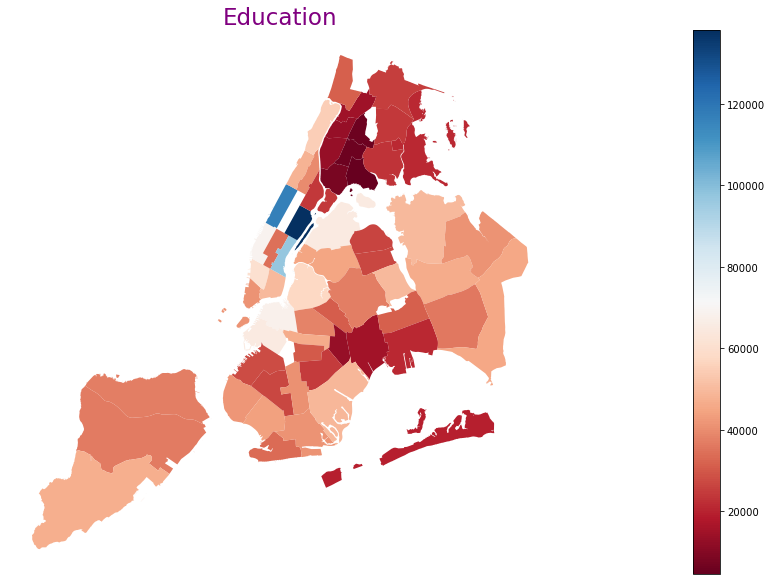

In [221]:
nyc_cm.plot(column='Data',legend=True,figsize=(50, 10),cmap='RdBu')
plt.axis('off')
plt.title('Education', fontsize=23, color ='purple')
plt.show()